In [3]:
import numpy as np
import pandas as pd
import pickle

In [5]:
merged_supply_chain_frame=pd.read_csv(r"./merged_supply_chain_frame.csv")
merged_supply_chain_frame

,news_type,industry,product,provider,provider_location,buyer_location,bill,行业,buyer,category
0,第一类新闻,风能,NaN,金盘科技,中游,下游,1.5亿元。,Industry: Energy.,甘肃瓜州宝丰风能开发有限公司,Energy
1,第一类新闻,CDMO,NaN,普洛药业,下游,上游,空。,Industry: HealthCare,江苏先声药业有限公司,HealthCare
2,第一类新闻,建筑材料,熔岩管,NaN,NaN,中游,NaN,Industry: Materials,北京空间机电研究所,Materials
3,第一类新闻,燃气和风力涡轮机,NaN,通用电气,下游,中游,NaN,Industry: Energy.,GE Vernova,Energy
4,第一类新闻,汽车电子产品,NaN,生益电子,中游,下游,空。,Industry: Industrials,多家客户,Industrials
...,...,...,...,...,...,...,...,...,...,...
1822,第一类新闻,航运,NaN,钦州港,上游,下游,NaN,Industry: Industrials,北部湾港,Industrials
1823,第一类新闻,门式起重机,GENMA,润邦重机,"上游,,,上游","上游,,,中游",NaN,Industry: Industrials,某知名海工模块企业,Industrials
1824,第一类新闻,门式起重机,GENMA,润邦重机,"上游,,,上游","上游,,,中游",NaN,Industry: Industrials,船舶制造企业,Industrials
1825,第一类新闻,生物科技,多肽合成,楚天科技,"上游,,,下游",NaN,空。,Industry: Healthcare.,楚天派特,HealthCare


In [6]:
category=merged_supply_chain_frame["category"].unique().tolist()

In [7]:
news=pd.read_csv(r"./新闻快讯_新浪.csv")
news['datetime']=pd.to_datetime(news['datetime'])
first_part_news=news[news["datetime"]>="2023-01-01"]
first_part_news=first_part_news[first_part_news["datetime"]<="2023-12-30"]
first_part_news

,datetime,content,title
1018937,2023-01-01 23:50:39,【开票一天售罄！上座率100%！北京演出行业全面恢复】2023年北京新年音乐会昨天（2022...,NaN
1018938,2023-01-01 23:42:04,【香港第五十六届工展会圆满闭幕 销售总额近10亿港元】1月1日，香港第五十六届工展会圆满闭幕...,NaN
1018939,2023-01-01 23:33:52,【2023年维也纳新年音乐会举行】2023年维也纳爱乐乐团新年音乐会1月1日在奥地利首都维也...,NaN
1018940,2023-01-01 23:27:35,【期指“神助攻”！这个另类策略开启“顺风局”】2022年A股市场跌宕起伏，私募行业主要股票类...,NaN
1018941,2023-01-01 23:24:57,【个别地区球蛋白“一瓶难求”：出厂价300多元，终端价缘何被炒至上千元】有渠道商透露称，球蛋...,NaN
...,...,...,...
1313554,2023-12-29 02:55:45,布宜诺斯艾利斯交易所提供的数据显示，阿根廷大豆种植完成率为78.6%。,NaN
1313555,2023-12-29 02:49:56,【美、布两油跌超2.5%】WTI原油失守72美元/桶，日内跌幅2.58%。布伦特原油日内走低...,NaN
1313556,2023-12-29 02:49:49,【2024年首批38只新基金发行“定档”】12月29日是2023年最后一个交易日，在基金争夺...,NaN
1313557,2023-12-29 02:45:52,【贩卖焦虑虚假宣传保险产品现象有所抬头，专家称需加大制度约束减少虚假宣传】在营销过程中，虚假...,NaN


In [12]:
data = {'Text': ['This is a sample text.', 'Another text example', 'Some random words']}
df = pd.DataFrame(data)
# 判断"Text"列中的字符串是否包含单词 "sample"
df[df['Text'].str.contains('sample')]

,Text
0,This is a sample text.


In [16]:
#筛选新闻，加上时间
# 遍历merged_supply_chain_frame中的每一行
for index, row in merged_supply_chain_frame.iterrows():
    provider = row['provider']
    buyer = row['buyer']
    # 在news中查找同时包含provider和buyer的新闻
    matching_news = first_part_news[(first_part_news['content'].str.contains(fr'\b{provider}\b', regex=True))]
    if not matching_news.empty:
        # 获取匹配的新闻的时间戳
        timestamp = matching_news.iloc[0]['datetime']
        # 将时间戳添加到merged_supply_chain_frame中的相应行
        merged_supply_chain_frame.at[index, '时间'] = timestamp
    else:
        # 如果没有找到匹配的新闻，设置时间戳为NaN
        merged_supply_chain_frame.at[index, '时间'] = pd.NaT  

In [17]:
supply_chain_keywords=["产业链","供应链","价值链","供需","供给","供应","采购","出售","销售","上下游","竞争","合作","供货","合作伙伴","合资","转让",'合作', '签','订单', '项目', '供应', '合约', '合同', '协议','收到', '协同', '上游', '产业链', '授权', '配额','承接', '原材料', '整合','客户' ,'供货', '方案', '提供', '业务', '双方','客户','渠道']
supply_chain_keywords=set(supply_chain_keywords)
supply_chain_keywords=list(supply_chain_keywords)

In [18]:
#用关键词筛选出的新闻再筛选，减小工作量
# 判断是否包含关键词的函数
def contains_keyword(text,keywords):
    for keyword in keywords:
        if keyword in text:
            return True
    return False

In [19]:
first_part_news['contains_keyword'] = first_part_news['content'].apply(contains_keyword,args=(supply_chain_keywords,))
second_part_news=first_part_news[first_part_news["contains_keyword"]==True]
second_part_news

,datetime,content,title,contains_keyword
1018938,2023-01-01 23:42:04,【香港第五十六届工展会圆满闭幕 销售总额近10亿港元】1月1日，香港第五十六届工展会圆满闭幕...,NaN,True
1018941,2023-01-01 23:24:57,【个别地区球蛋白“一瓶难求”：出厂价300多元，终端价缘何被炒至上千元】有渠道商透露称，球蛋...,NaN,True
1018942,2023-01-01 23:18:49,【风暴来袭 美国加州面临大面积洪水灾害和停电】据美国有线电视新闻网（CNN）当地时间1月1日...,NaN,True
1018944,2023-01-01 22:59:09,【福州177个项目集中开工 总投资983亿元】新年第一天，福州全市集中开工项目共177个，总...,NaN,True
1018945,2023-01-01 22:58:02,【购置新能源汽车不再享受补贴 部分新能源车价格元旦起上调】从今天起，购置新能源汽车将不再享受...,NaN,True
...,...,...,...,...
1313546,2023-12-29 03:20:43,【AI正从试点走向大规模应用 算力供应明年或将改善】2023年，以ChatGPT为代表，生成...,NaN,True
1313548,2023-12-29 03:16:24,【证券时报评论：拼多多“仅退款”获行业跟进，消费者博弈地位上升】曾引起巨大争议的拼多多“仅退...,NaN,True
1313554,2023-12-29 02:55:45,布宜诺斯艾利斯交易所提供的数据显示，阿根廷大豆种植完成率为78.6%。,NaN,True
1313557,2023-12-29 02:45:52,【贩卖焦虑虚假宣传保险产品现象有所抬头，专家称需加大制度约束减少虚假宣传】在营销过程中，虚假...,NaN,True


In [20]:
 waste_list=["上市","基金","证券","A轮","注册资本","政策","法院","央行","定增","A+轮","收购","投资",'美国', '伊朗', '外长', '韩国','中方', '国家','对华','欧盟','中签',
  '日本', '斯坦','人民银行','亚运','总统','上涨','上调','闭幕','演习','部队','收涨','城镇','社区','印度','政治','出口','公积金','全年销售','俄','澳大利亚','党','融资',
  '医保','旅游','养老金','银保监会','通关','感染','乌克兰','荷兰','尼日利亚','我国','查处','阿联酋','新西兰','病毒','教育局','接种','期货','开盘','财政','监管','防疫',
  '土耳其','主力合约','下调','事业单位','春晚','加拿大','疾病','德国','工信部','销售额','全球','工商','印尼','英国','收盘','人才','埃及','业绩','农村','创业板','新加坡',
  '马来西亚','香港','芬兰','强国','振兴','意大利','联合国','挪威','法国','交易所','部长','销售部','改革','评级','墨西哥','美联储','运河','营业','市区','发改委','行长',
  '政协','通告','科创板','库存','卡塔尔','员工','地震','欧元','指数','港股','跌超','立案','贷','建议','调查','函','救援','高盛','沙特','民政厅','货币','石油','海关',
  '投诉','通告','市场价','越南','罚','科技部','瑞士','盘前','盘后','国务院','货币','局','摩根','A股','瑞典','产权','台积电','营收','碳中和','苹果'
  '分红','学院','行动','商务部','购房','春节','人民币','城市','债券','机场','二手房','中科院','现货','京津冀','政府','城市','回购','股份','选举','开工'
    '集合竞价','赔偿','暂未','股票','期权','运输部','消保委','订票','旅客']
second_part_news['contains_waste'] = second_part_news['content'].apply(contains_keyword,args=(waste_list,))
third_part_news=second_part_news[second_part_news["contains_waste"]==False]
third_part_news

C:\Users\10679\AppData\Local\Temp\ipykernel_9164\2414185984.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_part_news['contains_waste'] = second_part_news['content'].apply(contains_keyword,args=(waste_list,))


,datetime,content,title,contains_keyword,contains_waste
1018941,2023-01-01 23:24:57,【个别地区球蛋白“一瓶难求”：出厂价300多元，终端价缘何被炒至上千元】有渠道商透露称，球蛋...,NaN,True,False
1018963,2023-01-01 21:31:03,【阿姆斯壮（西安）与盈建科、东洲际达成战略合作】1月1日，阿姆斯壮（西安）与盈建科、东洲...,NaN,True,False
1018975,2023-01-01 20:17:57,【2022年埃安销量超27.1万台】据埃安消息，2022年12月销量30007台，同比增...,NaN,True,False
1019006,2023-01-01 18:05:54,【国补退坡后，岚图汽车限时90天提供三万元购车补贴】1月1日，针对2023年新能源汽车补贴终...,NaN,True,False
1019010,2023-01-01 17:58:38,【DSCC：2023年折叠手机出货增三成 将达1700万台】DSCC研究咨询数据显示，虽然可...,NaN,True,False
...,...,...,...,...,...
1313410,2023-12-29 08:42:39,【上海电气与中国中煤签订战略合作协议】 12月28日，上海电气与中国中煤在京签订战略合作框架...,NaN,True,False
1313426,2023-12-29 08:06:34,【中银航空租赁：向空中客车公司购买四架A321NEO及两架A320NEO飞机】中银航空租赁在...,NaN,True,False
1313433,2023-12-29 07:54:12,【NAND芯片报价仍未达到厂商盈亏平衡点 未来或再涨50%】NAND芯片价格止跌回升后，目前...,NaN,True,False
1313434,2023-12-29 07:54:00,【汾酒工作人员回应竞品提价：应该会通过一些方式来返给经销商】距离2024年仅有短短数日，白酒...,NaN,True,False


In [32]:
#创建用于apply函数
def search_provider_buyer(text,provider,buyer):
    #print(text)
    #print(type(text))
    if (provider in text)&(buyer in text):
        return True
    else:
        return False
flag=0
third_part_news["content"]=third_part_news["content"].astype("str")
for index, row in merged_supply_chain_frame.iterrows():
    provider = row['provider']
    buyer = row['buyer']
    # 在news中查找同时包含provider和buyer的新闻
    try:#这里不知道为什么会有type error，都是球蛋白那条新闻引发的，但检查了明明是字符串，不知道为什么会报是float的错误
        matching_news = third_part_news[third_part_news.apply(lambda x: search_provider_buyer(x['content'], provider, buyer), axis=1)]
        if not matching_news.empty:
            # 获取匹配的新闻的时间戳
            timestamp = matching_news.iloc[0]['datetime']
            # 将时间戳添加到merged_supply_chain_frame中的相应行
            merged_supply_chain_frame.at[index, '时间'] = timestamp
        else:
            # 如果没有找到匹配的新闻，设置时间戳为NaN
            merged_supply_chain_frame.at[index, '时间'] = pd.NaT
    except TypeError:
        flag=1

C:\Users\10679\AppData\Local\Temp\ipykernel_9164\3564173049.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_part_news["content"]=third_part_news["content"].astype("str")


In [33]:
merged_supply_chain_frame

,news_type,industry,product,provider,provider_location,buyer_location,bill,行业,buyer,category,时间
0,第一类新闻,风能,NaN,金盘科技,中游,下游,1.5亿元。,Industry: Energy.,甘肃瓜州宝丰风能开发有限公司,Energy,2023-01-03 18:29:18
1,第一类新闻,CDMO,NaN,普洛药业,下游,上游,空。,Industry: HealthCare,江苏先声药业有限公司,HealthCare,2023-01-03 17:21:54
2,第一类新闻,建筑材料,熔岩管,NaN,NaN,中游,NaN,Industry: Materials,北京空间机电研究所,Materials,NaT
3,第一类新闻,燃气和风力涡轮机,NaN,通用电气,下游,中游,NaN,Industry: Energy.,GE Vernova,Energy,2023-01-03 09:03:20
4,第一类新闻,汽车电子产品,NaN,生益电子,中游,下游,空。,Industry: Industrials,多家客户,Industrials,2023-01-04 20:59:28
...,...,...,...,...,...,...,...,...,...,...,...
1822,第一类新闻,航运,NaN,钦州港,上游,下游,NaN,Industry: Industrials,北部湾港,Industrials,NaT
1823,第一类新闻,门式起重机,GENMA,润邦重机,"上游,,,上游","上游,,,中游",NaN,Industry: Industrials,某知名海工模块企业,Industrials,NaT
1824,第一类新闻,门式起重机,GENMA,润邦重机,"上游,,,上游","上游,,,中游",NaN,Industry: Industrials,船舶制造企业,Industrials,NaT
1825,第一类新闻,生物科技,多肽合成,楚天科技,"上游,,,下游",NaN,空。,Industry: Healthcare.,楚天派特,HealthCare,NaT


In [36]:
filtered_rows = merged_supply_chain_frame[pd.notna(merged_supply_chain_frame['时间'])]
filtered_rows 

,news_type,industry,product,provider,provider_location,buyer_location,bill,行业,buyer,category,时间
0,第一类新闻,风能,NaN,金盘科技,中游,下游,1.5亿元。,Industry: Energy.,甘肃瓜州宝丰风能开发有限公司,Energy,2023-01-03 18:29:18
1,第一类新闻,CDMO,NaN,普洛药业,下游,上游,空。,Industry: HealthCare,江苏先声药业有限公司,HealthCare,2023-01-03 17:21:54
3,第一类新闻,燃气和风力涡轮机,NaN,通用电气,下游,中游,NaN,Industry: Energy.,GE Vernova,Energy,2023-01-03 09:03:20
4,第一类新闻,汽车电子产品,NaN,生益电子,中游,下游,空。,Industry: Industrials,多家客户,Industrials,2023-01-04 20:59:28
5,第一类新闻,能源,NaN,中贝通信,上游,下游,2.4亿元-3.2亿元,Industry: Energy,浙储能源,Energy,2023-01-04 18:07:15
...,...,...,...,...,...,...,...,...,...,...,...
1808,第一类新闻,版权授权,NaN,亿腾网络,上游,中游,NaN,Industry: IT.,伴鱼科技,IT,2023-12-26 20:08:07
1811,第一类新闻,ARVR天线及部分零部件产品,NaN,硕贝德,中游,下游,NaN,Industry: Information Technology (IT),北美客户,IT,2023-06-01 15:32:16
1814,第一类新闻,城市轨道交通,NaN,腾达建设,中游,下游,7.35亿元。,Industry: Industrials.,杭州市,Industrials,2023-01-06 16:00:26
1816,第一类新闻,电力工程,33kV变电站GIS及自动化系统,威胜信息,中游,下游,5000万元。,Industry: Utilities,孟加拉电力工程公司,IT,2023-12-28 09:43:21


In [37]:
#获取上交所和深交所所有股票代码信息
import baostock as bs
import pandas as pd
# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)
# 获取证券基本资料
rs = bs.query_stock_basic()
# rs = bs.query_stock_basic(code_name="浦发银行")  # 支持模糊查询
print('query_stock_basic respond error_code:'+rs.error_code)
print('query_stock_basic respond  error_msg:'+rs.error_msg)
# 打印结果集
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

login success!
login respond error_code:0
login respond  error_msg:success
query_stock_basic respond error_code:0
query_stock_basic respond  error_msg:success


In [38]:
result

,code,code_name,ipoDate,outDate,type,status
0,of.159001,易方达保证金货币A,2013-03-29,,5,1
1,of.159003,招商保证金快线A,2013-05-17,,5,1
2,of.159005,汇添富收益快钱货币A,2014-12-23,,5,1
3,of.159150,易方达深证50ETF,2023-11-29,,5,1
4,of.159350,富国深证50ETF,2023-11-30,,5,1
...,...,...,...,...,...,...
7915,sz.399994,中证信息安全主题指数,2015-03-12,,2,1
7916,sz.399995,中证基建工程指数,2015-03-12,,2,1
7917,sz.399996,中证智能家居指数,2014-09-17,,2,1
7918,sz.399997,中证白酒指数,2015-01-21,,2,1


In [39]:
result.to_csv(r"./output/all_stocks_cn.csv",index=False,encoding="utf_8_sig")

In [40]:
all_stocks=set(result["code_name"])
stocks_from_news=set(filtered_rows["provider"].tolist()+filtered_rows["provider"].tolist())

In [41]:
intersection_set = all_stocks.intersection(stocks_from_news)
print(intersection_set)

{'中复神鹰', '幸福蓝海', '闻泰科技', '京华激光', '蓝帆医疗', '创维数字', '捷荣技术', '兆讯传媒', '小商品城', '中百集团', '奥飞数据', '智微智能', '佳禾智能', '节能铁汉', '优刻得', '海欣食品', '东田微', '宝兰德', '多利科技', '弘信电子', '科信技术', '精工科技', '硕贝德', '二六三', '横店东磁', '蓝箭电子', '大烨智能', '中亦科技', '当虹科技', '亿纬锂能', '安集科技', '东方集团', '永清环保', '飞荣达', '安达维尔', '上工申贝', '科博达', '华海药业', '软通动力', '皇庭国际', '川环科技', '宁波方正', '西藏矿业', '浙富控股', '亿道信息', '虹软科技', '信质集团', '申联生物', '特发信息', '我爱我家', '宝立食品', '宝新能源', '江苏国信', '安凯客车', '崇达技术', '沃森生物', '长源东谷', '顺网科技', '瑞鹄模具', '美瑞新材', '巨一科技', '海容冷链', '拓尔思', '华自科技', '容百科技', '金盘科技', '福事特', '一博科技', '银河电子', '中国电建', '久日新材', '江南化工', '高新兴', '华峰化学', '龙源技术', '重庆水务', '光峰科技', '生益电子', '光环新网', '宇环数控', '云鼎科技', '密封科技', '长久物流', '上能电气', '上海沿浦', '联得装备', '强瑞技术', '天源环保', '保龄宝', '汇创达', '万马科技', '金陵药业', '广电运通', '汇金科技', '华阳集团', '中熔电气', '华设集团', '吉大通信', '证通电子', '中电环保', '首都在线', '骄成超声', '伟创电气', '罗博特科', '古鳌科技', '浙大网新', '唯特偶', '博俊科技', '君实生物', '浙江世宝', '四方光电', '大族激光', '方直科技', '华贸物流', '江龙船艇', '力源信息', '中国铁物', '三祥新材', '东方通', '力合微', '奇安信', '恒信东方', '多氟多', '依米康', '博济医药', '裕太微', '顺博合金', '维

In [43]:
#result筛选在intersection_set的股票
stock_pool=result[result["code_name"].isin(intersection_set)]
stock_pool

,code,code_name,ipoDate,outDate,type,status
1822,sh.600178,东安动力,1998-10-14,,1,1
1904,sh.600268,国电南自,1999-11-18,,1,1
1965,sh.600335,国机汽车,2001-03-05,,1,1
2029,sh.600415,小商品城,2002-05-09,,1,1
2066,sh.600475,华光环能,2003-07-21,,1,1
...,...,...,...,...,...,...
7477,sz.301373,凌玮科技,2023-02-08,,1,1
7494,sz.301396,宏景科技,2022-11-11,,1,1
7506,sz.301446,福事特,2023-07-25,,1,1
7514,sz.301488,豪恩汽电,2023-07-04,,1,1


In [44]:
stock_code_list=stock_pool["code"].tolist()

In [45]:
#获取股票池中股票整年的交易数据
stock_data=pd.DataFrame()
for stock_code in stock_code_list:
    lg = bs.login()
    # 显示登陆返回信息
    print('login respond error_code:'+lg.error_code)
    print('login respond  error_msg:'+lg.error_msg)
    #### 获取沪深A股历史K线数据 ####
    # 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。“分钟线”不包含指数。
    # 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
    # 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
    rs = bs.query_history_k_data_plus(stock_code,
    "date,code,close,adjustflag,turn,tradestatus,pctChg,isST",
    start_date='2023-01-01', end_date='2023-12-31',
    frequency="d", adjustflag="2")
    print('query_history_k_data_plus respond error_code:'+rs.error_code)
    print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)
    #### 打印结果集 ####
    data_list = []
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        data_list.append(rs.get_row_data())
    result = pd.DataFrame(data_list, columns=rs.fields)
    stock_data=pd.concat([stock_data,result])

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
que

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
que

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
que

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
que

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
que

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
que

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
que

In [46]:
stock_data

,date,code,close,adjustflag,turn,tradestatus,pctChg,isST
0,2023-01-03,sh.600178,6.1143728800,2,0.470400,1,1.986800,0
1,2023-01-04,sh.600178,6.1540766000,2,0.568600,1,0.649400,0
2,2023-01-05,sh.600178,6.1739284600,2,0.411800,1,0.322600,0
3,2023-01-06,sh.600178,6.1838543900,2,0.674000,1,0.160800,0
4,2023-01-09,sh.600178,6.2136321800,2,0.651500,1,0.481500,0
...,...,...,...,...,...,...,...,...
16,2023-12-25,sz.301508,35.7800000000,2,19.843100,1,-1.972600,0
17,2023-12-26,sz.301508,32.9700000000,2,27.151100,1,-7.853500,0
18,2023-12-27,sz.301508,33.3400000000,2,16.478500,1,1.122200,0
19,2023-12-28,sz.301508,33.9300000000,2,18.848300,1,1.769600,0


In [48]:
stock_data_copy=stock_data.iloc[:,:]
stock_data_copy=stock_data_copy.reset_index(drop=True)
stock_data_copy

,date,code,close,adjustflag,turn,tradestatus,pctChg,isST
0,2023-01-03,sh.600178,6.1143728800,2,0.470400,1,1.986800,0
1,2023-01-04,sh.600178,6.1540766000,2,0.568600,1,0.649400,0
2,2023-01-05,sh.600178,6.1739284600,2,0.411800,1,0.322600,0
3,2023-01-06,sh.600178,6.1838543900,2,0.674000,1,0.160800,0
4,2023-01-09,sh.600178,6.2136321800,2,0.651500,1,0.481500,0
...,...,...,...,...,...,...,...,...
69790,2023-12-25,sz.301508,35.7800000000,2,19.843100,1,-1.972600,0
69791,2023-12-26,sz.301508,32.9700000000,2,27.151100,1,-7.853500,0
69792,2023-12-27,sz.301508,33.3400000000,2,16.478500,1,1.122200,0
69793,2023-12-28,sz.301508,33.9300000000,2,18.848300,1,1.769600,0


In [49]:
stock_data_copy.to_csv(r"./output/stock_data.csv",index=False,encoding="utf_8_sig")

In [54]:
#新闻发布后，标记该月该只股票状态为待买入。每月末换仓，买入持仓期为一个月，选择等权持仓
#重构filtered_rows的形式
filtered_rows_provider=filtered_rows[["时间","provider"]]
company_provider=filtered_rows_provider.rename(columns={"provider":"company"})
filtered_rows_buyer=filtered_rows[["时间","buyer"]]
company_buyer=filtered_rows_buyer.rename(columns={"buyer":"company"})
provider_buyer=pd.concat([company_provider,company_buyer])
provider_buyer

,时间,company
0,2023-01-03 18:29:18,金盘科技
1,2023-01-03 17:21:54,普洛药业
3,2023-01-03 09:03:20,通用电气
4,2023-01-04 20:59:28,生益电子
5,2023-01-04 18:07:15,中贝通信
...,...,...
1808,2023-12-26 20:08:07,伴鱼科技
1811,2023-06-01 15:32:16,北美客户
1814,2023-01-06 16:00:26,杭州市
1816,2023-12-28 09:43:21,孟加拉电力工程公司


In [55]:
filtered_provider_buyer=provider_buyer[provider_buyer["company"].isin(intersection_set)]
filtered_provider_buyer

,时间,company
0,2023-01-03 18:29:18,金盘科技
1,2023-01-03 17:21:54,普洛药业
4,2023-01-04 20:59:28,生益电子
5,2023-01-04 18:07:15,中贝通信
10,2023-01-05 14:19:19,比亚迪
...,...,...
1646,2023-12-03 15:41:18,长源东谷
1678,2023-12-06 17:33:42,中国移动
1728,2023-07-23 16:42:49,中国移动
1768,2023-11-15 22:15:27,中贝通信


In [57]:
filtered_provider_buyer['date'] = filtered_provider_buyer['时间'].dt.strftime('%Y-%m-%d')
filtered_provider_buyer.sort_values(by=["date"],ascending=True,inplace=True)
filtered_provider_buyer

C:\Users\10679\AppData\Local\Temp\ipykernel_9164\366543001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_provider_buyer['date'] = filtered_provider_buyer['时间'].dt.strftime('%Y-%m-%d')
C:\Users\10679\AppData\Local\Temp\ipykernel_9164\366543001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_provider_buyer.sort_values(by=["date"],ascending=True,inplace=True)


,时间,company,date
0,2023-01-03 18:29:18,金盘科技,2023-01-03
1,2023-01-03 17:21:54,普洛药业,2023-01-03
4,2023-01-04 20:59:28,生益电子,2023-01-04
5,2023-01-04 18:07:15,中贝通信,2023-01-04
255,2023-01-05 09:27:30,立讯精密,2023-01-05
...,...,...,...
1784,2023-12-21 10:29:32,东杰智能,2023-12-21
1793,2023-12-22 13:38:27,汇川技术,2023-12-22
1803,2023-12-25 20:15:34,金盘科技,2023-12-25
1816,2023-12-28 09:43:21,威胜信息,2023-12-28


In [60]:
all_stocks_cn=pd.read_csv(r"./output/all_stocks_cn.csv")

In [61]:
#filtered_provider_buyer合并股票代码信息（all_stocks_cn）
merged_provider_buyer=pd.merge(filtered_provider_buyer,all_stocks_cn,left_on="company",right_on="code_name",how="left")
merged_provider_buyer

,时间,company,date,code,code_name,ipoDate,outDate,type,status
0,2023-01-03 18:29:18,金盘科技,2023-01-03,sh.688676,金盘科技,2021-03-09,NaN,1,1
1,2023-01-03 17:21:54,普洛药业,2023-01-03,sz.000739,普洛药业,1997-05-09,NaN,1,1
2,2023-01-04 20:59:28,生益电子,2023-01-04,sh.688183,生益电子,2021-02-25,NaN,1,1
3,2023-01-04 18:07:15,中贝通信,2023-01-04,sh.603220,中贝通信,2018-11-15,NaN,1,1
4,2023-01-05 09:27:30,立讯精密,2023-01-05,sz.002475,立讯精密,2010-09-15,NaN,1,1
...,...,...,...,...,...,...,...,...,...
524,2023-12-21 10:29:32,东杰智能,2023-12-21,sz.300486,东杰智能,2015-06-30,NaN,1,1
525,2023-12-22 13:38:27,汇川技术,2023-12-22,sz.300124,汇川技术,2010-09-28,NaN,1,1
526,2023-12-25 20:15:34,金盘科技,2023-12-25,sh.688676,金盘科技,2021-03-09,NaN,1,1
527,2023-12-28 09:43:21,威胜信息,2023-12-28,sh.688100,威胜信息,2020-01-21,NaN,1,1


In [65]:
merged_provider_buyer["company"].iloc[0]

'金盘科技'

In [62]:
swap_bin=["2023-01-31","2023-02-28","2023-03-31","2023-04-30","2023-05-31","2023-06-30","2023-07-30","2023-08-30","2023-09-30","2023-10-31","2023-11-30","2023-12-30"]

In [69]:
a=[1,2,3]
sum(a)

6

In [71]:
stock_data_copy["close"]=stock_data_copy["close"].astype("float")

In [74]:
bin=len(swap_bin)
month_11_return=[1]#初始值为1
for i in range(bin-1):
    temp_frame=0
    if i==0:
        temp_frame=merged_provider_buyer[merged_provider_buyer["date"]<=swap_bin[0]]
    else:
        temp_frame=merged_provider_buyer[(merged_provider_buyer["date"]>swap_bin[i-1])&(merged_provider_buyer["date"]<=swap_bin[i])]
    #get stock to invest
    stock_invested=temp_frame["code"].tolist()
    revenue_list=[]#return
    for stock in stock_invested:
        stock_next_month_data=stock_data_copy[stock_data_copy["code"]==stock]
        monthly_return=stock_next_month_data["close"].iloc[-1]/stock_next_month_data["close"].iloc[0]
        revenue_list.append(monthly_return)
    average_return=sum(revenue_list)/len(revenue_list)
    month_11_return.append(average_return)

In [75]:
month_11_return

[1,
 1.073950774559446,
 1.0419232140068564,
 1.037934364306078,
 1.1716813985224215,
 0.9913307301402118,
 1.0207028157119309,
 1.4849003254550812,
 1.0961488416568863,
 1.2206235621208192,
 1.3782861789207286,
 1.1494559898449883]

In [76]:
cumulative_product = []
current_product = 1  # 初始化当前乘积为1
for num in month_11_return:
    current_product *= num
    cumulative_product.append(current_product)
print(cumulative_product)

[1, 1.073950774559446, 1.118974242714131, 1.1614218192863666, 1.3608163414959051, 1.3490190574018674, 1.376947550339141, 2.0446298656331674, 2.2412186588308716, 2.7356843028337834, 3.7705558644861927, 4.334088023478802]


In [99]:
#hitrate的计算，即股票一个月内是否上涨
revenue_list1=[]#return
bin=len(swap_bin)
for i in range(bin-1):
    temp_frame=0
    if i==0:
        temp_frame=merged_provider_buyer[merged_provider_buyer["date"]<=swap_bin[0]]
    else:
        temp_frame=merged_provider_buyer[(merged_provider_buyer["date"]>swap_bin[i-1])&(merged_provider_buyer["date"]<=swap_bin[i])]
    #get stock to invest
    stock_invested=temp_frame["code"].tolist()
    for stock in stock_invested:
        stock_next_month_data=stock_data_copy[stock_data_copy["code"]==stock]
        monthly_return=stock_next_month_data["close"].iloc[-1]/stock_next_month_data["close"].iloc[0]
        revenue_list1.append(monthly_return)
count = sum(1 for num in revenue_list1 if num > 1)
hit_rate=count/len(revenue_list1)
hit_rate

0.570264765784114

In [102]:
sum(revenue_list1)/len(revenue_list1)

1.1290467558657842

In [105]:
from scipy import stats
population_mean = 1  # 假设的总体均值
t_statistic, p_value = stats.ttest_1samp(revenue_list1, population_mean)
print("T-statistic:", t_statistic)
print("P value:", p_value)

T-statistic: 6.17264137931055
P value: 1.4095814012778427e-09


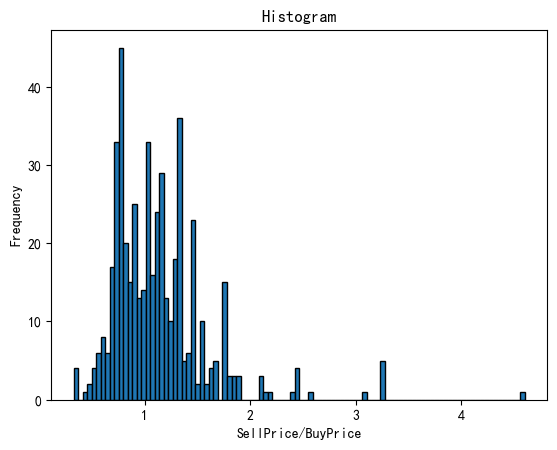

In [101]:
plt.hist(revenue_list1, bins=100, edgecolor='black')
# 设置标题和坐标轴标签
plt.title('Histogram')
plt.xlabel('SellPrice/BuyPrice')
plt.ylabel('Frequency')
# 显示图表
plt.show()

In [90]:
# 登陆系统
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)
# 获取指数(综合指数、规模指数、一级行业指数、二级行业指数、策略指数、成长指数、价值指数、主题指数)K线数据
# 综合指数，例如：sh.000001 上证指数，sz.399106 深证综指 等；
# 规模指数，例如：sh.000016 上证50，sh.000300 沪深300，sh.000905 中证500，sz.399001 深证成指等；
# 一级行业指数，例如：sh.000037 上证医药，sz.399433 国证交运 等；
# 二级行业指数，例如：sh.000952 300地产，sz.399951 300银行 等；
# 策略指数，例如：sh.000050 50等权，sh.000982 500等权 等；
# 成长指数，例如：sz.399376 小盘成长 等；
# 价值指数，例如：sh.000029 180价值 等；
# 主题指数，例如：sh.000015 红利指数，sh.000063 上证周期 等；

# 详细指标参数，参见“历史行情指标参数”章节；“周月线”参数与“日线”参数不同。
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.000905",
    "date,code,open,high,low,close,preclose,volume,amount,pctChg",
    start_date='2023-01-01', end_date='2023-12-30', frequency="d")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)
# 打印结果集
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
zz500_one_year = pd.DataFrame(data_list, columns=rs.fields)
zz500_one_year

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success


,date,code,open,high,low,close,preclose,volume,amount,pctChg
0,2023-01-03,sh.000905,5861.5504,5964.8185,5848.1461,5955.8969,5864.4669,9955783700,119271237764.2000,1.559050
1,2023-01-04,sh.000905,5952.5062,5970.5758,5922.8646,5952.4538,5955.8969,9716044100,114358731440.4000,-0.057810
2,2023-01-05,sh.000905,5959.4378,6017.3406,5950.0896,6010.4641,5952.4538,9662997900,117479981150.9000,0.974561
3,2023-01-06,sh.000905,6004.1731,6050.8874,5998.8349,6012.8152,6010.4641,9924487700,121596399779.3000,0.039117
4,2023-01-09,sh.000905,6028.3990,6070.1614,6023.6388,6040.0193,6012.8152,10069682900,124921325580.9000,0.452435
...,...,...,...,...,...,...,...,...,...,...
237,2023-12-25,sh.000905,5301.5735,5339.6644,5288.4665,5315.3746,5311.6902,6591877200,81018151918.5000,0.069364
238,2023-12-26,sh.000905,5312.7999,5313.9193,5238.0417,5258.2841,5315.3746,6753200700,80910364895.8000,-1.074064
239,2023-12-27,sh.000905,5261.5699,5293.7973,5235.4559,5285.5301,5258.2841,7539791800,84253444705.4000,0.518154
240,2023-12-28,sh.000905,5280.6904,5400.2364,5275.4028,5382.7966,5285.5301,10769923900,126896204801.3000,1.840241


In [92]:
zz_monthly_return=[1]
zz500_one_year["close"]=zz500_one_year["close"].astype("float")
for i in range(1,bin):
    temp_frame=zz500_one_year[zz500_one_year["date"]<=swap_bin[i]]
    accu_return=temp_frame["close"].iloc[-1]/temp_frame["close"].iloc[0]
    zz_monthly_return.append(accu_return)
zz_monthly_return

[1,
 1.0674354017108658,
 1.064460719593719,
 1.047910030141724,
 1.0154309588535693,
 1.0071915952742567,
 1.0146656165253634,
 0.9696530173314452,
 0.9554849245291671,
 0.9281958020462041,
 0.9310185339172007,
 0.9115719917851499]

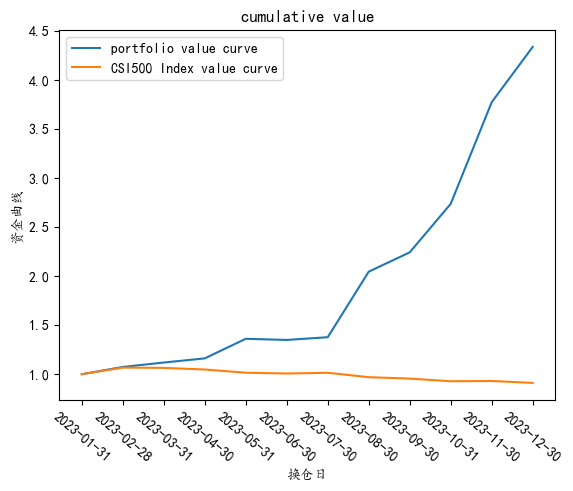

<Figure size 5000x5000 with 0 Axes>

In [98]:
#画图
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'KaiTi'
plt.rcParams['font.size'] = 10
plt.xticks(rotation=-40)
plt.plot(swap_bin, cumulative_product, label='portfolio value curve')
plt.plot(swap_bin, zz_monthly_return, label='CSI500 Index value curve')
# 设置图表标题和坐标轴标签
plt.title('cumulative value',size=12)
plt.xlabel('换仓日')
plt.ylabel('资金曲线')
# 添加图例
plt.legend()
plt.figure(figsize=(50, 50))
# 显示图表
plt.show()